## Raster Data

In [1]:
import matplotlib.pyplot as plt
import sys
import numpy as np
import os
sys.path.insert(0, os.path.abspath('../../'))
from skmap.data import toy
from skmap.io import process
import importlib
import time
importlib.reload(process)

n_it = 3
n_n_t = 100
n_n_s = 2500
time_grid_dense = np.empty((n_n_t, n_n_s, n_it))
time_grid_fft = np.empty((n_n_t, n_n_s, n_it))
n_t_vec = range(n_n_t)
n_s_vec = range(n_n_s)
for k in range(n_it):
    for n_t in n_t_vec:
        st_t = time.time()
        print(f"n_t = {n_t}")
        for n_s in n_s_vec:
            data = np.random.rand(1,n_t+1,n_s+1)
            n_f = data.shape[2]-1
            n_p = data.shape[2]-1
            w_f = np.random.rand(n_f)
            w_p = np.random.rand(n_p)
            st = time.time()
            sircleTransformer = process.SircleTransformer(w_0=1, w_f=w_f, w_p=w_p, backend="dense")
            out_dense = sircleTransformer._run(data)
            time_grid_dense[n_t, n_s, k] = time.time()-st
            # sircleTransformer = process.SircleTransformer(w_0=1, w_f=w_f, w_p=w_p, backend="sparse")
            # out_sparse = sircleTransformer._run(data)
            st = time.time()
            sircleTransformer = process.SircleTransformer(w_0=1, w_f=w_f, w_p=w_p, backend="FFT")
            out_fft = sircleTransformer._run(data)
            time_grid_fft[n_t, n_s, k] = time.time()-st
            # sircleTransformer = process.SircleTransformer(w_0=1, w_f=w_f, w_p=w_p, backend="summation")
            # out_sum = sircleTransformer._run(data)
        print(f"{time.time() -st_t}s")
        np.save("time_grid_dense_20231219", time_grid_dense)
        np.save("time_grid_fft_20231219", time_grid_fft)


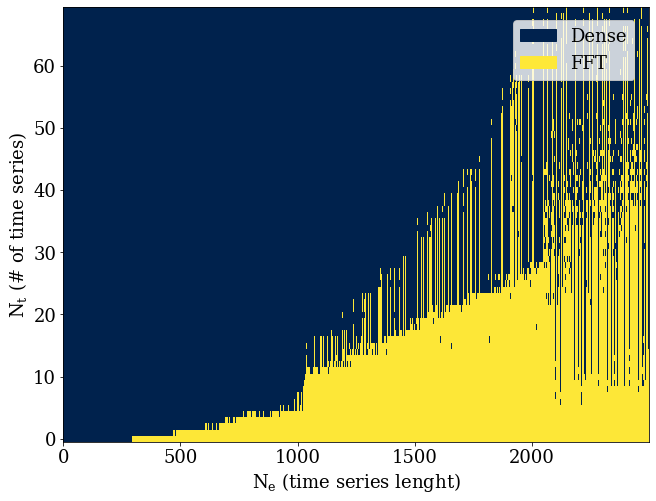

In [59]:
import matplotlib.pyplot as plt
import numpy as np
time_grid_dense = np.load("time_grid_dense_20231215.npy")
time_grid_fft = np.load("time_grid_fft_20231215.npy")
import matplotlib.patches as mpatches
n_n_t = 100
n_n_s = 2500
r_s = 0
# r_e = 20
r_e = 70
c_s = 0
c_e = n_n_s
time_grid_dense_avg = np.mean(time_grid_dense, 2)
time_grid_fft_avg = np.mean(time_grid_fft, 2)
res = (time_grid_dense_avg-time_grid_fft_avg)>0
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(10.5,8))
im = plt.imshow(res[r_s:r_e,c_s:c_e], aspect='auto', origin="lower", cmap='cividis',  interpolation='nearest')
# plt.colorbar()
plt.xlabel('$\mathregular{N_e}$ (time series lenght)')
plt.ylabel('$\mathregular{N_t}$ (# of time series)')
colors = [ im.cmap(im.norm(value)) for value in [0, 1]]
# create a patch (proxy artist) for every color 
labels = ['Dense', 'FFT']
patches = [ mpatches.Patch(color=colors[i], label="{l}".format(l=labels[i]) ) for i in [0, 1] ]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(0.99, 0.99))
plt.savefig('ragion_dense_fft.png', dpi=600)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

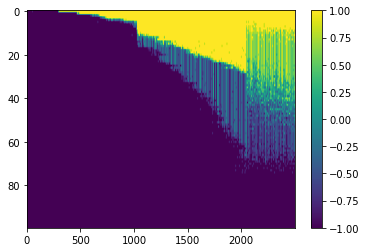

In [5]:
r_s = 0
# r_e = 20
r_e = n_n_t
c_s = 0
c_e = n_n_s
time_grid_dense_avg = np.mean(time_grid_dense, 2)
time_grid_fft_avg = np.mean(time_grid_fft, 2)
res = np.sign(time_grid_dense_avg-time_grid_fft_avg)
plt.imshow(res[r_s:r_e,c_s:c_e], aspect='auto')
plt.colorbar()
plt.show

In [2]:
np.save("time_grid_dense", time_grid_dense)
np.save("time_grid_fft", time_grid_fft)

In [ ]:
out_iter

In [ ]:
out_dense

In [ ]:
out_fft

In [ ]:
out_sum

In [44]:
import numpy as np
from scipy.signal import savgol_filter
from scipy.signal import savgol_coeffs
np.set_printoptions(precision=2)  # For compact display.
x = np.array(np.random.rand(2,2,9))
coef = savgol_coeffs(5, 2, use='dot')
i = 3
def roll_pad(a, t):
    if t > 0:
        b = np.pad(a[:-t], (t, 0), mode='constant')
    elif t == 0:
        b = a
    else:
        b = np.pad(a[-t:], (0, -t), mode='constant')
    return b
res = np.empty((9,))
for i in range(9):
    vec = roll_pad(x[0,0,:],2-i)
    res[i] = vec[0:5].dot(coef)
print(res)
print(savgol_filter(x, 5, 2, mode='constant', cval=0, axis=-1))

[0.42 0.58 0.61 0.72 0.36 0.32 0.69 0.9  0.57]
[[[0.42 0.58 0.61 0.72 0.36 0.32 0.69 0.9  0.57]
  [0.46 0.54 0.17 0.32 0.53 0.62 0.34 0.47 0.42]]

 [[0.74 0.67 0.53 0.34 0.45 0.37 0.39 0.42 0.35]
  [0.53 0.87 0.87 0.92 0.61 0.2  0.25 0.61 0.54]]]


In [63]:
import matplotlib.pyplot as plt
import sys
import numpy as np
import os
sys.path.insert(0, os.path.abspath('../../'))
from skmap.data import toy
from skmap.io import process
import importlib
import time
importlib.reload(process)
from tqdm.notebook import tqdm

from scipy.signal import savgol_filter
from scipy.signal import savgol_coeffs

n_n_t = 200
n_n_s = 100
time_grid_sircle = np.empty((n_n_t, n_n_s))
time_grid_scipy = np.empty((n_n_t, n_n_s))

n_nnz = 50
w_l = 2*n_nnz+1
p_o = 2
coef = savgol_coeffs(w_l, p_o, use='dot')
w_0 = coef[n_nnz]
w_f = coef[n_nnz+1:]
w_p = coef[0:n_nnz]
cut = w_l
for n_t in tqdm(range(n_n_t)):
    st_t = time.time()
    for n_s in range(n_n_s):
        if n_s >= cut:
            data = np.random.rand(1,n_t+1,n_s+1)
            st = time.time()
            sircleTransformer = process.SircleTransformer(w_0=w_0, w_f=w_f, w_p=w_p, backend="dense")
            out_sircle = sircleTransformer._run(data)
            time_grid_sircle[n_t, n_s] = time.time()-st

            st = time.time()
            out_scipy = savgol_filter(data, w_l, p_o, mode='constant', cval=0, axis=-1)
            time_grid_scipy[n_t, n_s] = time.time()-st
            
            # print("out_sircle")
            # print(out_sircle)
            # print("out_scipy")
            # print(out_scipy)
            # print("Relative difference")
            # print(np.linalg.norm(out_scipy-out_sircle)/np.linalg.norm(out_scipy))
    # print(f"{time.time() - st_t}s")


  0%|          | 0/200 [00:00<?, ?it/s]

/tmp/ipykernel_2486751/3313262983.py:7: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.imshow(res[r_s:r_e,c_s:c_e], aspect='auto')


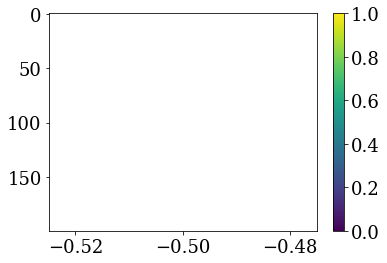

In [64]:
r_s = 0
# r_e = 20
r_e = n_n_t
c_s = cut
c_e = n_n_s
res = np.sign(time_grid_sircle-time_grid_scipy)
plt.imshow(res[r_s:r_e,c_s:c_e], aspect='auto')
plt.colorbar()
plt.show()

In [5]:
time_grid_sircle[-1,-1]

0.001077890396118164

In [6]:
time_grid_scipy[-1,-1]

0.00018596649169921875